Ingrese las coordenadas de la entidad (separadas por una coma de 0 a 4): 2,2


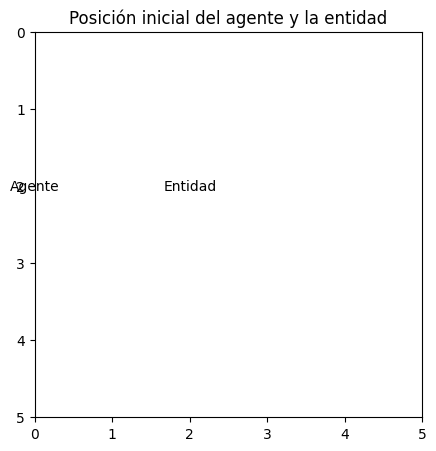

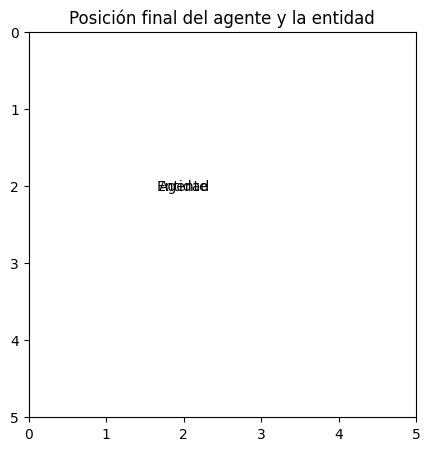

In [40]:
import numpy as np
import matplotlib.pyplot as plt

class Environment:
    def __init__(self, size, entity_pos):
        self.size = size
        self.entity_pos = np.array(entity_pos) #genera una posicion random para la entidad en un entorno de size

    def get_state(self, agent_pos):
        return np.append(agent_pos, self.entity_pos)
        #devuelve un array que contiene la posición del agente y la posición de la entidad, que representa el estado actual del entorno.

    def get_reward(self, agent_pos): #recompensa basada en la posicion del agente
        return int(np.all(agent_pos == self.entity_pos)) #recompensa cuando el agente cae sobre la entidad

class Agent:
    def __init__(self, env):
        self.env = env
        self.q_table = np.zeros((env.size, env.size, env.size, env.size, 4)) #1

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(self.q_table[tuple(state)])  #elige la mejor opcion de la tabla Q

    def update_q_table(self, state, action, reward, next_state, alpha, gamma):   #actualiza la tabla q basado en la experiencia adquirida, bellman
        old_value = self.q_table[tuple(state.tolist() + [action])]  #Valor Q actual para estado y accion
        next_max = np.max(self.q_table[tuple(next_state)]) #valor maximo de Q de la mejor accion que el agente podria tomar en el prox estado
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # Nuevo valor actualizado para la tabla Q
        self.q_table[tuple(state.tolist() + [action])] = new_value #actualiza el nuevo valor calculado en la tabla q

def train_agent(agent, episodes, alpha=0.5, gamma=0.9, epsilon=0.6):
    rewards = np.zeros((agent.env.size, agent.env.size))  # Para almacenar las recompensas
    for episode in range(episodes):                                                                           #2
        agent_pos = np.random.randint(0, agent.env.size, 2) #inicializa el agente en una posicion aleatoria   #3
        if episode == 0: # Si es el primer episodio, graficamos la posición inicial del agente y la entidad
            plt.figure(figsize=(agent.env.size, agent.env.size))
            plt.text(agent_pos[1], agent_pos[0], 'Agente', ha='center', va='center')
            plt.text(agent.env.entity_pos[1], agent.env.entity_pos[0], 'Entidad', ha='center', va='center')
            plt.xlim(0, agent.env.size)
            plt.ylim(0, agent.env.size)
            plt.title("Posición inicial del agente y la entidad")
            plt.gca().invert_yaxis()
            plt.show()
        while not agent.env.get_reward(agent_pos):              #4
            state = agent.env.get_state(agent_pos) #estado del entorno. agente y entidad
            action = agent.choose_action(state, epsilon)
            if action == 0:   # arriba
                next_pos = agent_pos + [-1, 0]
            elif action == 1: # abajo
                next_pos = agent_pos + [1, 0]
            elif action == 2: # izquierda
                next_pos = agent_pos + [0, -1]
            else:             # derecha
                next_pos = agent_pos + [0, 1]
            next_pos = np.clip(next_pos, 0, agent.env.size - 1) #limita al agente
            reward = agent.env.get_reward(next_pos) #recompensa para la nueva posicion del agente
            next_state = agent.env.get_state(next_pos) #nuevo estado despues de la accion
            agent.update_q_table(state, action, reward, next_state, alpha, gamma) #actualizacion de la qtable con la experiencia adquirida
            agent_pos = next_pos #actualiza la posicion del agente
            if reward > 0:
                rewards[tuple(agent_pos)] = 1
    # Después de todos los episodios, graficamos la posición final del agente y la entidad
    plt.figure(figsize=(agent.env.size, agent.env.size))
    plt.text(agent_pos[1], agent_pos[0], 'Agente', ha='center', va='center')
    plt.text(agent.env.entity_pos[1], agent.env.entity_pos[0], 'Entidad', ha='center', va='center')
    plt.xlim(0, agent.env.size)
    plt.ylim(0, agent.env.size)
    plt.title("Posición final del agente y la entidad")
    plt.gca().invert_yaxis()
    plt.show()
    return rewards

if __name__ == "__main__":
    entity_pos = input("Ingrese las coordenadas de la entidad (separadas por una coma de 0 a 4): ")
    entity_pos = list(map(int, entity_pos.split(',')))  # convierte la entrada del usuario en una lista de enteros
    env = Environment(5, entity_pos)
    agent = Agent(env)
    train_agent(agent, 500)
